<a href="https://colab.research.google.com/github/hcyberpunk/First_Assignment/blob/main/blobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install hdbscan

In [2]:
# Importing required libraries
import numpy as np
import hdbscan
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.datasets import make_blobs
# load decomposition to do PCA analysis with sklearn
from sklearn import decomposition
from sklearn.datasets import load_digits
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from keras.datasets import cifar10 # subroutines for fetching the CIFAR-10 dataset
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values
import numpy as np
from sklearn.utils import shuffle
from skimage import feature
from tensorflow import keras


In [3]:
#use of make_blobs to create dataset
centers = [[1, 1], [-1, -1], [1, -1],[-1,1]]
X, y = make_blobs(
    n_samples=600, n_features = 10, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)


In [4]:
#PCA to reduce dimenstions
from sklearn.decomposition import PCA
pca = decomposition.PCA(n_components=2)
pc = pca.fit_transform(X)

In [5]:
pc.shape

(600, 2)

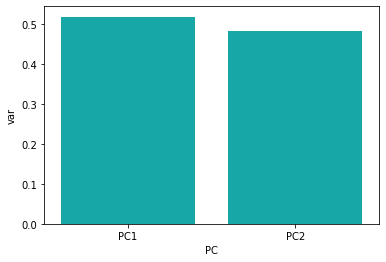

In [6]:
#simple plot to see variation distribution between PC1 and PC2
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

In [7]:
pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1', 'PC2'])
pc_df['Cluster'] = y
pc_df.head()

,PC1,PC2,Cluster
0,-0.288009,-0.876133,3
1,1.565570,0.773105,0
2,0.149751,1.899963,2
3,0.647674,0.819072,2
4,-0.345606,1.135489,2


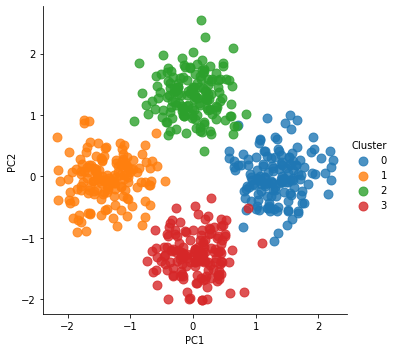

In [8]:
#plot
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 80})

[0 2 2 2 2 2 1 0 2 2 1 1 0 2 1 0 1 1 2 0 1 0 2 1 0 2 2 2 2 2 2 2 0 0 0 0 2
 1 1 1 1 0 1 1 0 0 2 0 2 0 2 2 0 1 0 1 2 2 0 0 2 0 1 0 2 1 0 0 2 0 0 2 0 1
 0 0 0 0 1 1 0 2 0 0 0 1 0 0 0 0 1 1 0 2 1 0 2 2 1 0 2 0 2 0 1 0 2 0 0 0 2
 2 0 0 1 0 2 0 1 1 0 0 2 1 2 0 0 2 1 0 2 0 1 0 0 0 1 1 0 1 2 0 1 1 1 2 0 2
 1 0 1 0 1 1 2 2 0 0 0 0 2 0 0 2 1 0 1 1 0 0 0 2 0 0 0 1 2 0 1 2 1 1 2 2 2
 0 1 0 0 1 0 2 0 0 1 2 2 0 0 0 0 2 2 2 2 0 0 1 1 0 0 0 2 2 1 0 0 2 2 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 2 1 0 2 2 1 2 0 0 0 1 0 0 1 2 1 0 2
 0 2 1 2 0 1 1 2 2 1 0 2 1 1 0 1 0 1 0 0 0 1 0 1 1 2 2 0 1 0 2 2 0 1 0 2 2
 2 2 2 1 1 2 2 1 0 0 0 1 2 1 0 2 0 2 0 0 2 0 0 2 1 2 2 1 2 2 0 0 0 0 1 0 1
 1 1 2 0 2 1 2 0 1 0 0 0 0 2 0 1 2 0 2 0 0 1 0 0 1 2 0 0 2 0 0 0 0 0 0 0 0
 0 1 2 1 1 2 1 1 0 0 0 2 2 0 2 2 0 2 1 2 0 1 0 2 0 2 0 2 1 1 0 2 1 0 1 2 0
 2 1 1 1 2 0 0 1 1 2 0 0 0 1 1 0 1 0 0 2 0 0 2 0 1 0 2 0 1 0 0 2 0 2 2 1 0
 0 1 0 1 1 1 0 0 0 2 0 2 1 0 0 1 2 0 0 0 2 0 1 0 1 2 0 1 0 0 0 2 1 0 2 1 0
 0 0 0 0 2 0 0 1 0 2 1 0 

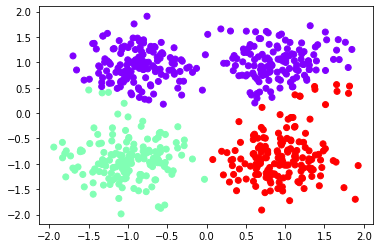

In [9]:
#clustering using K-means
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_kmeans = KMeans(n_clusters=3)
X_kmeans.fit(X)
# Predicting the cluster labels
labels = X_kmeans.predict(X)
print(labels)
# Finding the final centroids
centroids = X_kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap = 'rainbow')
plt.show()

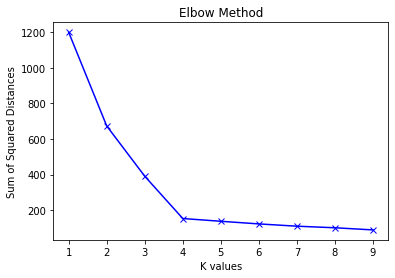

In [10]:
#verification of K using k-means
K = range(1,10)
sum_of_squared_distances = []
# Using Scikit Learn’s KMeans Algorithm to find sum of squared distances
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    sum_of_squared_distances.append(model.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

Estimated number of clusters: 4
Estimated number of noise points: 21
Homogeneity: 0.938
Completeness: 0.873
V-measure: 0.904
Adjusted Rand Index: 0.934
Adjusted Mutual Information: 0.904
Silhouette Coefficient: 0.591


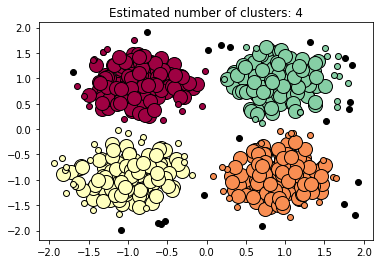

In [11]:
#clustering using dbscan
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(y, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [12]:
#clustering using HDBSCAN
clusterer = hdbscan.HDBSCAN()
clusterer.fit(X)
clusterer.labels_

array([ 1,  0,  2,  3,  2,  0,  5,  0,  2,  2,  5,  5,  1,  2, -1,  1,  5,
        5,  2,  0,  5,  1, -1,  5,  1,  2, -1,  2,  2, -1,  2,  2,  1,  0,
        0,  1, -1,  5,  5,  5,  5,  0,  5,  5,  1,  0,  2,  0, -1,  0,  2,
        2,  0,  1,  1, -1,  0,  0,  0,  1,  2,  0, -1,  0, -1, -1,  1,  1,
        2,  1,  1,  2,  0,  5,  1,  0,  1,  0,  5,  5,  0,  2,  1, -1,  0,
        5, -1,  0,  1,  0,  5, -1,  0,  2,  5,  1,  0,  2, -1,  0,  2,  1,
        2,  0,  5,  1,  2,  1,  0,  0,  2,  2,  0,  0,  5, -1,  2,  1,  5,
        5,  1,  1,  2,  5,  2,  1,  1,  2,  5,  0,  2,  1,  5,  0,  1,  0,
        5,  5,  0, -1, -1,  0,  5,  5, -1,  2,  1,  2,  5,  0, -1,  1,  5,
       -1,  2,  3,  1,  1,  0,  0,  2,  1,  0, -1,  5, -1,  5, -1,  0,  1,
        0,  2,  0,  0,  1,  5,  2,  0,  1,  2,  5, -1,  2,  2, -1,  1, -1,
        0,  1,  5,  1, -1,  0,  1, -1,  2,  2,  0,  1,  1,  1,  2,  2, -1,
        2,  0,  0,  4,  5,  0,  1,  0,  2,  2, -1,  1,  1,  2, -1,  0,  1,
        1,  1,  0, -1,  0

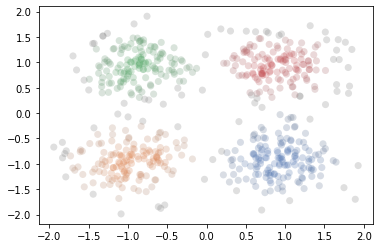

In [13]:
#clustering using HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(X)
color_palette = sns.color_palette('deep', 8)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*X.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [14]:
score = clusterer.probabilities_

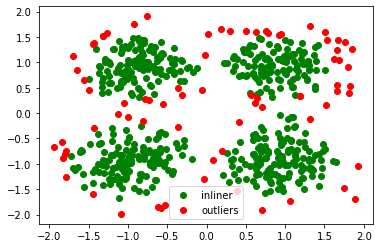

In [15]:
#outlier demonstration
mask_outliers = (score < 0.3)
mask_inliers = ~mask_outliers
plt.scatter(X[mask_inliers, 0], X[mask_inliers, 1], c= 'g', label='inliner')
plt.scatter(X[mask_outliers, 0], X[mask_outliers, 1], c= 'r', label='outliers')
plt.legend()

In [16]:
sorted_scores = np.argsort(score)

In [17]:
X[sorted_scores[1]]

array([1.1845708 , 0.33512276])